In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import urllib.parse

# 검색어를 인코딩해서 URL에 추가

url = "https://www.coupang.com/np/search?rocketAll=false&searchId=c7f5fb930593449c82a0633f0f1c31fe&q=%EB%AC%BC%ED%8B%B0%EC%8A%88&brand=&offerCondition=&filter=&availableDeliveryFilter=&filterType=&isPriceRange=false&priceRange=&minPrice=&maxPrice=&page=1&trcid=&traid=&filterSetByUser=true&channel=user&backgroundColor=&searchProductCount=75293&component=&rating=0&sorter=saleCountDesc&listSize=72"

headers = {    
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,  like Gecko) Chrome/124.0.0.0 Safari/537.36',    
    'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    'referer' : 'https://www.coupang.com/'
}

res = requests.get(url, headers=headers, timeout=5)
        
soup = BeautifulSoup(res.text, "html.parser")
soup



<!DOCTYPE html>

<!--[if lte IE 7 ]><html class="lt-ie9 lt-ie8" lang="ko-KR"><![endif]-->
<!--[if IE 8 ]><html class="lt-ie9" lang="ko-KR"><![endif]-->
<!--[if (gte IE 9)|!(IE)]><!--><html lang="ko-KR"><!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="zaNrGtrOLMjglkziY2IvmL8dOXyCWHGArDHqFazJQVI" name="google-site-verification"/>
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="//cart.coupang.com" rel="dns-prefetch"/>
<link href="//assets.coupang.com" rel="dns-prefetch"/>
<link href="//assets2.coupang.com" rel="dns-prefetch"/>
<link href="//assets.coupangcdn.com" rel="dns-prefetch"/>
<link href="//asset1.coupangcdn.com" rel="dns-prefetch"/>
<link href="//private.coupang.com" rel="dns-prefetch"/>
<link href="//img1a.coupangcdn.com" rel="dns-prefetch"/>
<link href="//image1.coupangcdn.com" rel="dns-prefetch"/>
<link href="//thumbnail1.coupangcdn.com" rel="dns-prefetch"/>
<link href="//static.coupangcdn.com" rel="dns-prefetch"/>
<link href="//www.facebook.

In [44]:
search_content = soup.find('div', class_='search-content')
product_list = search_content.find('ul', id='productList')
search_products = product_list.find_all('li', class_='search-product')


In [45]:
search_products

[<li class="search-product" data-coupon-nudge-text="" data-coupon-tag-area="" data-freebie-vendor-item-id="null" data-handyman-area="" data-is-rocket="true" data-is-soldout="" data-last-purchase-style="" data-product-id="188227098" data-vendor-item-id="4403776090" data-winner-vendor-item-id="4403776090" id="188227098"><a class="search-product-link" data-is-soldout="" data-item-id="537550763" data-product-id="188227098" data-srp-log='{"group":"PRODUCT", "itemId":"537550763", "productId":"188227098", "vendorItemId":"4403776090", "page":"1", "listSize":"72", "isCcidEligible":false, "displayCcidBadge":false, "wowOnlyInstantDiscountRate": 38, "snsDiscountRate" : -1, "isLoyaltyMember": false, "hasAsHandymanBadge":false }' data-vendor-item-id="4403776090" href="/vp/products/188227098?itemId=537550763&amp;vendorItemId=4403776090" target="_blank"><dl class="search-product-wrap adjust-spacing"><dt class="image">  </dt><dd class="descriptions"> <div class="descriptions-inner A"><div class="badges

In [35]:
search_products

[<li class="search-product" data-coupon-nudge-text="" data-coupon-tag-area="" data-freebie-vendor-item-id="null" data-handyman-area="" data-is-rocket="true" data-is-soldout="" data-last-purchase-style="" data-product-id="188227098" data-vendor-item-id="4403776090" data-winner-vendor-item-id="4403776090" id="188227098"><a class="search-product-link" data-is-soldout="" data-item-id="537550763" data-product-id="188227098" data-srp-log='{"group":"PRODUCT", "itemId":"537550763", "productId":"188227098", "vendorItemId":"4403776090", "page":"1", "listSize":"72", "isCcidEligible":false, "displayCcidBadge":false, "wowOnlyInstantDiscountRate": 38, "snsDiscountRate" : -1, "isLoyaltyMember": false, "hasAsHandymanBadge":false }' data-vendor-item-id="4403776090" href="/vp/products/188227098?itemId=537550763&amp;vendorItemId=4403776090" target="_blank"><dl class="search-product-wrap adjust-spacing"><dt class="image">  </dt><dd class="descriptions"> <div class="descriptions-inner A"><div class="badges

In [42]:
import re
import pandas as pd

data = []

for i in range(len(search_products)):

    product_name = search_products[i].find('div', class_='name').text.strip()
    # print(i+1, product_name)
    price_info = search_products[i].find('div', class_='price').text.strip()
    price_info = re.sub(r'\s+', '/', price_info)
    price_info = re.sub(r'\(|\)|,|[원당]', '', price_info)
    prices = price_info.split("/")
    # print(i+1, product_name, prices)

    unit_price = prices[-1]
    unit = prices[-2]
    price = prices[-3]

    # 기본 값으로 설정
    original_price = price
    discount_ratio = '0%'

    if len(prices) > 4:  # 할인율 정보가 있는 경우
        original_price = prices[-4]
        discount_ratio = prices[-5]
    elif len(prices) == 4:  # 할인율 정보가 없는 경우
        original_price = prices[-4]
    elif len(prices) == 3:  # 가격 정보만 있는 경우
        pass

    # print(i+1, product_name, unit_price, unit, price, original_price, discount_ratio)

    rocket_icon = search_products[i].find('span', class_='badge rocket')
    rocket = "1" if rocket_icon else "0"

    rating_tag = None
    rating_star_tag = search_products[i].find('div', class_='rating-star')
    if rating_star_tag:
        rating_tag = rating_star_tag.find('em', class_='rating')

    if rating_tag:
        rating = rating_tag.text.strip()
    else:
        rating = ""

    review_count_tag = None
    if rating_star_tag:
        review_count_tag = rating_star_tag.find('span', class_='rating-total-count')

    if review_count_tag:
        review_count = review_count_tag.text.strip()
        review_count = re.sub(r'\(|\)', '', review_count)
    else:
        review_count = "0"

    data.append([i+1, product_name, discount_ratio, original_price, price, unit, unit_price, rocket, rating, review_count])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Rank', 'Product Name', 'Discount Ratio', 'Original Price', 'Price', 'Unit', 'Unit Price', 'Rocket', 'Rating', 'Review Count'])
print(df)


    Rank                                     Product Name Discount Ratio  \
0      1                      코멧 아기물티슈 오리지널 캡형, 100매, 10팩            37%   
1      2                         탐사 클래식 물티슈 캡형, 100매, 10팩            15%   
2      3                    베베숲 유아용 오리진 물티슈 캡형, 100매, 10개            27%   
3      4           베베앙 오리지널 플러스 아기물티슈 캡형 55gsm, 100매, 10개            42%   
4      5  블랑슈 저자극 대용량 오리지널 소프트 유아물티슈 캡형 50gsm, 102개입, 10개            47%   
5      6        베베앙 120 엠보싱 대용량 아기물티슈 캡형 50gsm, 120매, 10개            49%   
6      7              아망떼 베이직 엠보싱 물티슈 캡형 40gsm, 120매, 10개            44%   
7      8               베베앙 시그니처 유아물티슈 캡형 50gsm, 100매, 10개            43%   
8      9                          센스 물티슈 오키 캡형, 100매, 10개            39%   
9     10                         탐사 클래식 물티슈 캡형, 100매, 20팩            16%   
10    11             코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형, 100매, 10팩            45%   
11    12                   베베숲 시그니처 블루 유아물티슈 캡형, 70매, 10팩             0%   
12    13    

In [69]:
df

,Rank,packs
0,1,10.0
1,2,10.0
2,3,10.0
3,4,10.0
4,5,10.0
5,6,10.0
6,7,10.0
7,8,10.0
8,9,10.0
9,10,20.0


In [3]:
pd.set_option('display.max_rows', None)

In [27]:
df

,Rank,Product Name,Discount Ratio,Original Price,Price,Unit,Unit Price,Rocket,Rating,Review Count
0,1,"베베숲 유아용 오리진 물티슈 캡형, 100매, 10개",27%,17900,12900,10매,129,1,5.0,22666
1,2,"블랑슈 저자극 대용량 오리지널 소프트 유아물티슈 캡형 50gsm, 102개입, 10개",47%,24900,12980,10매,127,1,5.0,21322
2,3,"아망떼 베이직 엠보싱 물티슈 캡형 40gsm, 120매, 10개",44%,20900,11590,10매,97,1,4.5,45134
3,4,"베베앙 시그니처 유아물티슈 캡형 50gsm, 100매, 10개",43%,22900,12990,10매,130,1,5.0,45913
4,5,"탐사 클래식 물티슈 캡형, 100매, 20팩",16%,19800,16590,10매,83,1,4.5,254074
5,6,"깨끗한나라 페퍼민트 물티슈 캡형, 70매, 10팩",25%,17300,12930,10매,185,1,5.0,62574
6,7,"베베숲 센시티브 엠보싱 물티슈 캡형 65gsm, 80매, 10개",0%,22900,22900,10매,286,1,5.0,153993
7,8,"땡큐 오리지널 물티슈 100매(캡형), 100매, 20팩",32%,18900,12790,10매,64,1,4.5,5129
8,9,"땡큐 물티슈 캡형, 100매, 20개",0%,14510,14510,10매,73,0,4.0,25816
9,10,"페넬로페 볼리드 화이트 저자극 아기물티슈 캡형, 100매, 10개",37%,20800,12900,10매,129,1,5.0,8515


In [1]:
df.head()

NameError: name 'df' is not defined

In [75]:
import pandas as pd

df = pd.read_csv('wettissue.csv')

In [76]:

split_columns = df['Product Name'].str.split(',\s*', expand=True)
split_columns.columns = ['name', 'quantity', 'packs']

# Insert the new columns at positions 1, 2, and 3
df.insert(1, 'name', split_columns['name'])
df.insert(2, 'quantity', split_columns['quantity'])
df.insert(3, 'packs', split_columns['packs'])


In [77]:
df.drop('Product Name', axis = 1, inplace = True)

In [78]:
df['packs'] = df['packs'].str[:-1]

In [79]:
df['packs'] = df['packs'].fillna(0)

In [86]:
df.loc[47, 'packs'] = 10

In [89]:
df = df.loc[:50, ['packs', 'Rank']]

In [73]:
df['packs'] = df['packs'].str.extract(r'(\d+)').astype(float)

In [74]:
df['packs']

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
5       10.0
6       10.0
7       10.0
8       10.0
9       20.0
10      10.0
11      10.0
12      10.0
13      10.0
14      10.0
15      10.0
16      10.0
17      20.0
18      10.0
19      10.0
20      10.0
21       NaN
22      10.0
23      20.0
24      20.0
25      12.0
26      10.0
27      10.0
28      10.0
29      20.0
30      10.0
31      10.0
32      10.0
33      10.0
34      10.0
35       4.0
36      10.0
37      20.0
38      10.0
39      10.0
40      10.0
41       NaN
42      20.0
43      10.0
44      12.0
45      10.0
46      20.0
47     100.0
48      12.0
49       8.0
50      20.0
51      12.0
52       8.0
53       NaN
54      12.0
55      10.0
56      10.0
57      12.0
58      10.0
59      10.0
60      20.0
61      10.0
62      12.0
63      10.0
64      10.0
65      10.0
66      10.0
67      12.0
68      10.0
69      10.0
70     120.0
71      10.0
72     100.0
73      10.0
74      10.0
75      20.0
76      10.0

ValueError: `bins` must increase monotonically, when an array

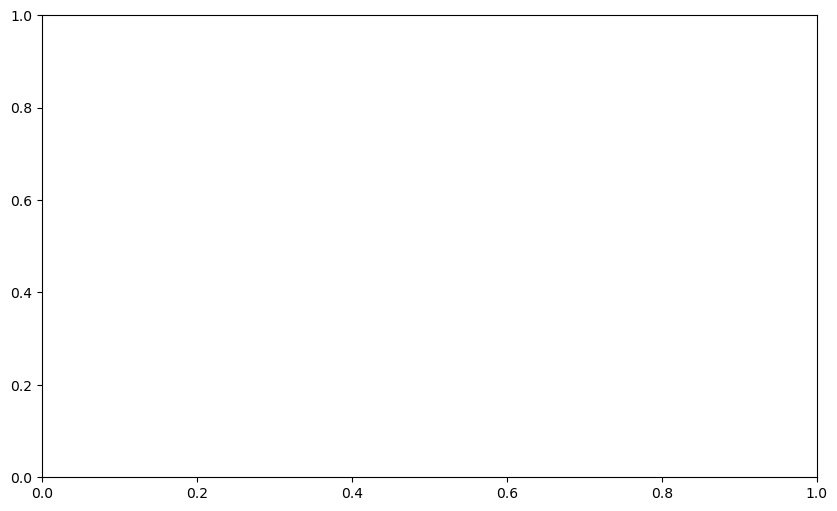

In [57]:
import matplotlib.pyplot as plt

# Plot scatter plot to show correlation between 'packs' and 'rank'
plt.figure(figsize=(10, 6))
plt.hist(df['Rank'], df['packs'], alpha=0.7)
plt.title('Correlation between Packs and Rank')
plt.grid(True)
plt.show()

In [59]:
df = df.head(50)

In [66]:
df = df.loc[:, ['Rank', 'packs']]


In [92]:
df.loc[21, 'packs'] = 10

In [97]:
df['packs'] = df['packs'].astype(float)

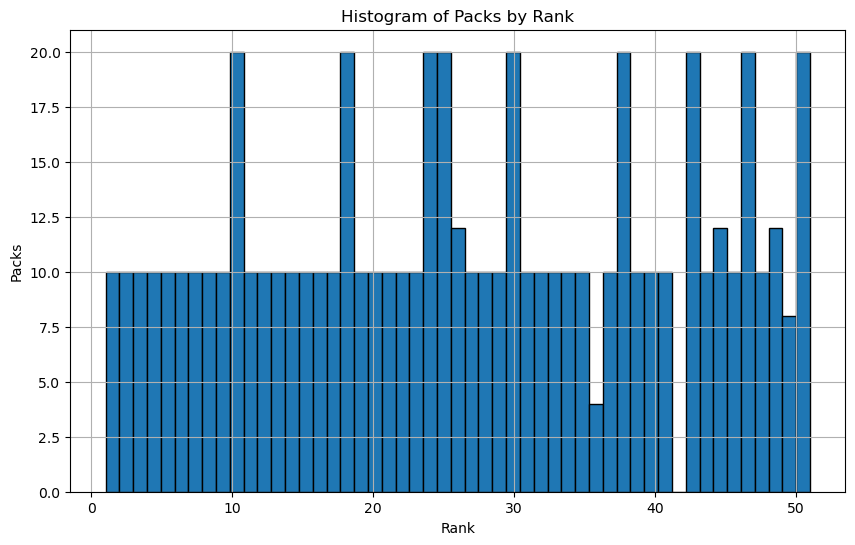

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rank'], bins=len(df['Rank']), weights=df['packs'], edgecolor='black')
plt.xlabel('Rank')
plt.ylabel('Packs')
plt.title('Histogram of Packs by Rank')
plt.grid(True)
plt.show()
plt.savefig('rank.png')

In [68]:
df

,Rank,packs
0,1,10.0
1,2,10.0
2,3,10.0
3,4,10.0
4,5,10.0
5,6,10.0
6,7,10.0
7,8,10.0
8,9,10.0
9,10,20.0
